
--- 📅 TABLEAU DE BORD HEBDOMADAIRE (Court Terme) ---


,Transaction ID,Total Spent,Quantity
Day_of_Week,,,
Monday,1441,12742.5,4330.0
Tuesday,1370,12642.5,4259.0
Wednesday,1407,12217.5,4150.0
Thursday,1426,12846.0,4326.0
Friday,1437,12770.0,4363.0
Saturday,1414,12630.5,4267.0
Sunday,1431,12755.0,4313.0



--- 🚀 PERFORMANCE DES PRODUITS (Long Terme) ---


,Total Spent,Quantity,Part_de_Marché (%)
Item,,,
Salad,19075.0,3815.0,21.53
Sandwich,13716.0,3429.0,15.48
Smoothie,13344.0,3336.0,15.06
Juice,10515.0,3505.0,11.87
Cake,10404.0,3468.0,11.74
Coffee,7756.0,3878.0,8.75
Tea,5433.0,3622.0,6.13
Unknown Item,4776.0,1370.0,5.39
Cookie,3585.0,3585.0,4.05



--- 🏆 LE CHAMPION ---
Le produit le plus rentable est : Salad
Il a généré 19075.0$ de CA (21.53% du total).

--- 📆 CHIFFRE D'AFFAIRES MENSUEL ---


Month
January      7534.5
February     6898.0
March        7569.5
April        7531.0
May          7197.5
June         7666.0
July         7168.0
August       7442.5
September    7106.0
October      7693.5
November     7262.5
December     7535.0
Name: Total Spent, dtype: float64

-> Le record de l'année a été atteint en October avec 7693.5$ de CA.

--- 💸 PANIER MOYEN GLOBAL : 8.93$ ---

Panier Moyen par Jour :
Day_of_Week
Monday       8.84
Tuesday      9.23
Wednesday    8.68
Thursday     9.01
Friday       8.89
Saturday     8.93
Sunday       8.91
Name: Total Spent, dtype: float64

--- 🥡 RÉPARTITION PAR LIEU (In-Store vs Takeaway) ---


Location
In-store    27010.0
Takeaway    26408.5
Unknown     35185.5
Name: Total Spent, dtype: float64

-> La vente à emporter représente 29.8% du Chiffre d'Affaires.

--- 💳 MÉTHODES DE PAIEMENT (en %) ---
Payment Method
Unknown           31.7
Digital Wallet    22.9
Credit Card       22.7
Cash              22.6
Name: proportion, dtype: float64


C:\Users\doria\AppData\Local\Temp\ipykernel_20948\2802923927.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Day_of_Week', order=order_days, palette='viridis')


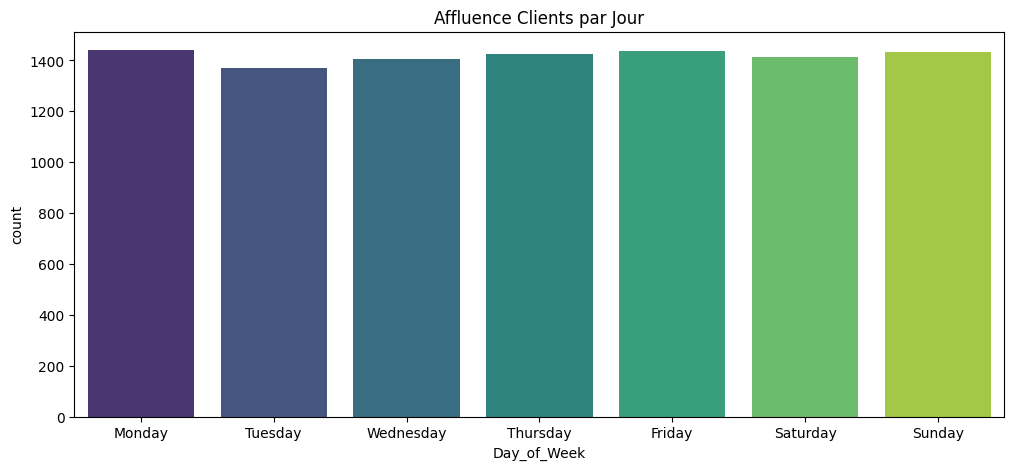

Transformation terminée et fichier sauvegardé !


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. CHARGEMENT
df = pd.read_csv('../DATA/PROCESSED/cleaned_cafe_sales.csv')

# Conversion des types (Sécurité)
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# --- 2. TRANSFORMATION (Création de colonnes) ---
df['Month'] = df['Transaction Date'].dt.month_name()
df['Day_of_Week'] = df['Transaction Date'].dt.day_name()

def categoriser_prix(prix):
    if prix < 2.0: return 'Low Cost'
    elif prix < 4.0: return 'Medium Cost'
    else: return 'High Cost'

df['Price_Category'] = df['Price Per Unit'].apply(categoriser_prix)

# --- 3. ANALYSE DÉCISIONNELLE (Vos Tableaux) ---

# A. TABLEAU COURT TERME (Votre code)
# Permet de gérer les plannings et les stocks de la semaine
kpi_hebdo = df.groupby('Day_of_Week').agg({
    'Transaction ID': 'count',       # Charge Staff
    'Total Spent': 'sum',            # Trésorerie
    'Quantity': 'sum'                # Stock
}).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

print("\n--- 📅 TABLEAU DE BORD HEBDOMADAIRE (Court Terme) ---")
display(kpi_hebdo)

# B. TABLEAU LONG TERME (Stratégie Produit)
# Permet d'analyser la rentabilité
kpi_produit = df.groupby('Item').agg({
    'Total Spent': 'sum',
    'Quantity': 'sum'
}).sort_values('Total Spent', ascending=False)

# Part de marché
total_ca = df['Total Spent'].sum()
kpi_produit['Part_de_Marché (%)'] = (kpi_produit['Total Spent'] / total_ca * 100).round(2)

print("\n--- 🚀 PERFORMANCE DES PRODUITS (Long Terme) ---")
display(kpi_produit)

# C. LE PRODUIT STAR (Flash Info)
best_seller = kpi_produit.iloc[0] # Le premier de la liste
print("\n--- 🏆 LE CHAMPION ---")
print(f"Le produit le plus rentable est : {kpi_produit.index[0]}")
print(f"Il a généré {best_seller['Total Spent']}$ de CA ({best_seller['Part_de_Marché (%)']}% du total).")


# D. CHIFFRE D'AFFAIRES PAR MOIS (Analyse Saisonnière)
# On groupe par mois et on somme le CA
kpi_mensuel = df.groupby('Month')['Total Spent'].sum()

# On force l'ordre chronologique (sinon c'est alphabétique : April, August...)
ordre_mois = ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 'December']

kpi_mensuel = kpi_mensuel.reindex(ordre_mois)

print("\n--- 📆 CHIFFRE D'AFFAIRES MENSUEL ---")
display(kpi_mensuel)

# Petit bonus : Trouver le meilleur mois automatiquement
meilleur_mois = kpi_mensuel.idxmax()
ca_max = kpi_mensuel.max()
print(f"-> Le record de l'année a été atteint en {meilleur_mois} avec {ca_max}$ de CA.")

# --- E. ANALYSE COMPORTEMENTALE (Les KPIs manquants) ---

# 1. LE PANIER MOYEN (Average Ticket)
# Total CA / Nombre de transactions
panier_moyen_global = df['Total Spent'].mean()
print(f"\n--- 💸 PANIER MOYEN GLOBAL : {panier_moyen_global:.2f}$ ---")

# On peut aussi le voir par jour (Est-ce qu'on dépense plus le Weekend ?)
panier_moyen_jour = df.groupby('Day_of_Week')['Total Spent'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
print("\nPanier Moyen par Jour :")
print(panier_moyen_jour.round(2))


# 2. ANALYSE DES CANAUX DE VENTE (Location)
# On compare le CA généré par chaque canal
kpi_location = df.groupby('Location')['Total Spent'].sum()

print("\n--- 🥡 RÉPARTITION PAR LIEU (In-Store vs Takeaway) ---")
display(kpi_location)

# Calcul du pourcentage
part_takeaway = (df[df['Location'] == 'Takeaway']['Total Spent'].sum() / df['Total Spent'].sum()) * 100
print(f"-> La vente à emporter représente {part_takeaway:.1f}% du Chiffre d'Affaires.")


# 3. PRÉFÉRENCES DE PAIEMENT
# Important pour la gestion de caisse
kpi_payment = df['Payment Method'].value_counts(normalize=True) * 100

print("\n--- 💳 MÉTHODES DE PAIEMENT (en %) ---")
print(kpi_payment.round(1))


# --- 4. VISUALISATION ---
plt.figure(figsize=(12, 5))
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df, x='Day_of_Week', order=order_days, palette='viridis')
plt.title('Affluence Clients par Jour')
plt.show()

# --- 5. SAUVEGARDE FINALE ---
df.to_csv('../DATA/PROCESSED/final_enriched_data.csv', index=False)
print("Transformation terminée et fichier sauvegardé !")

